In [45]:
import cv2
import numpy as np
import imageio as iio
from scipy import ndimage
from matplotlib import pyplot as plt

In [46]:
img = iio.imread('ct.jpg')
img = img[:,:,0]
(m,n) = img.shape
print(img.shape)

(256, 256)


1.0 0.9999999999999999


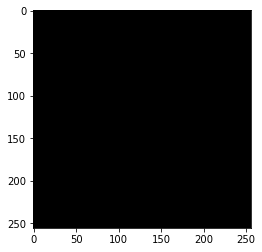

In [55]:
imgf = np.fft.fftshift(np.fft.fft2(img))
H = np.zeros((m,n)).astype(complex)
for i in range(m):
    for j in range(n):
        H[i,j] = np.exp(-1j*40*(i-m/2)*(2*np.pi/m) - 1j*20*(j-n/2)*(2*np.pi/n))
    
plt.imshow(255*np.round_(np.abs(H)).astype(np.uint8),cmap='gray')
print(np.max(np.abs(H)),np.min(np.abs(H)))

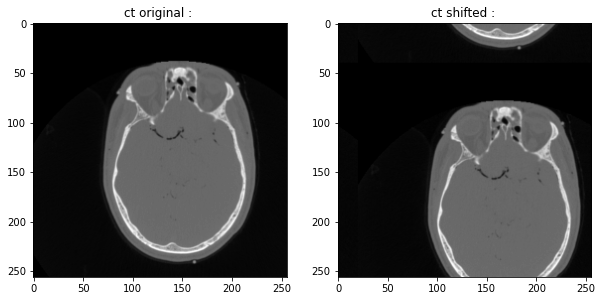

In [48]:
shifted = imgf*H
shifted = np.fft.ifft2(np.fft.ifftshift(shifted))

plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray');
plt.title('ct original : ');

plt.subplot(1,2,2)
plt.imshow(np.real(shifted).astype(np.uint8),cmap='gray');
plt.title('ct shifted : ');